In [2]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
# import requests
# import json

#Youtube Data API Packages: 
# from apiclient.discovery import build
# from apiclient.errors import HttpError
# from oauth2client.tools import argparser
# from googleapiclient.discovery import build
# import argparse
# from googleapiclient.errors import HttpError

#Modeling
# from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
#from sklearn.cluster import KMeans
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

#Time analysis
import time
import datetime as dt
"""from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf"""

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('classic')
sns.set_style('whitegrid')

# Word Clouds

In [3]:
df_classified = pd.read_csv('./data/classifieds/k_classified_data_with_distances.csv')

In [3]:
#https://www.copypastecharacter.com/alphabetical-order
#https://tools.oratory.com/altcodes.html

In [4]:
ord('Š')

352

In [5]:
custom_pops = ['facebook', 'twitter', 'http', 'https', 'com', 'www', 'Instagram', 'instagram', 'goo', 'youtube', 
               'àƒ', 'ãƒ','ìŠ', 'íƒ', 
              'official', 'music', 'video', 'musical', 'artist']

In [6]:
def print_k_word_cloud(k_class, text_col, max_words=None):
    df_for_corpus = df_classified
    df_for_corpus[text_col] =df_for_corpus[text_col].map(lambda x: '' if 'à' in str(x) or 'Ð' in str(x) else x)
    df_for_corpus = df_for_corpus[df_for_corpus['kclass']==k_class]
    if max_words is not None:
        df_for_corpus=df_for_corpus.iloc[0:max_words, :]
    corpus_string4 = ''
    for i in range(df_for_corpus.shape[0]):
        corpus_string4 = corpus_string4 + str(df_for_corpus.iloc[i][text_col])

    mycloud_4 = WordCloud(width=1000, height=1000, stopwords=stopwords.words('english')+custom_pops+stopwords.words('spanish'),
                        collocations=False, #get rid of duplicates
                       normalize_plurals=True).generate_from_text(corpus_string4)
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(mycloud_4)
    plt.axis("off")
    plt.tight_layout(pad = 0)

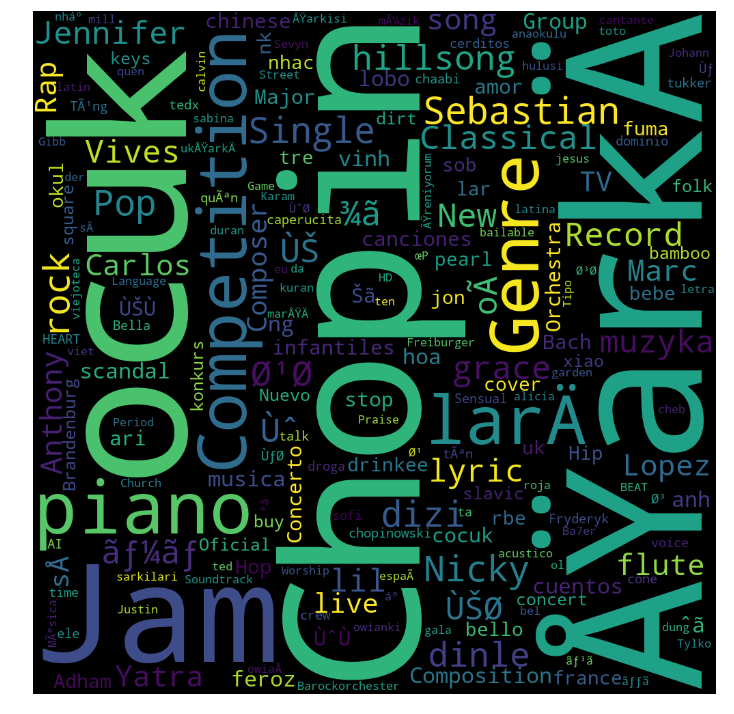

In [7]:
print_k_word_cloud(0,'tags', max_words=100)

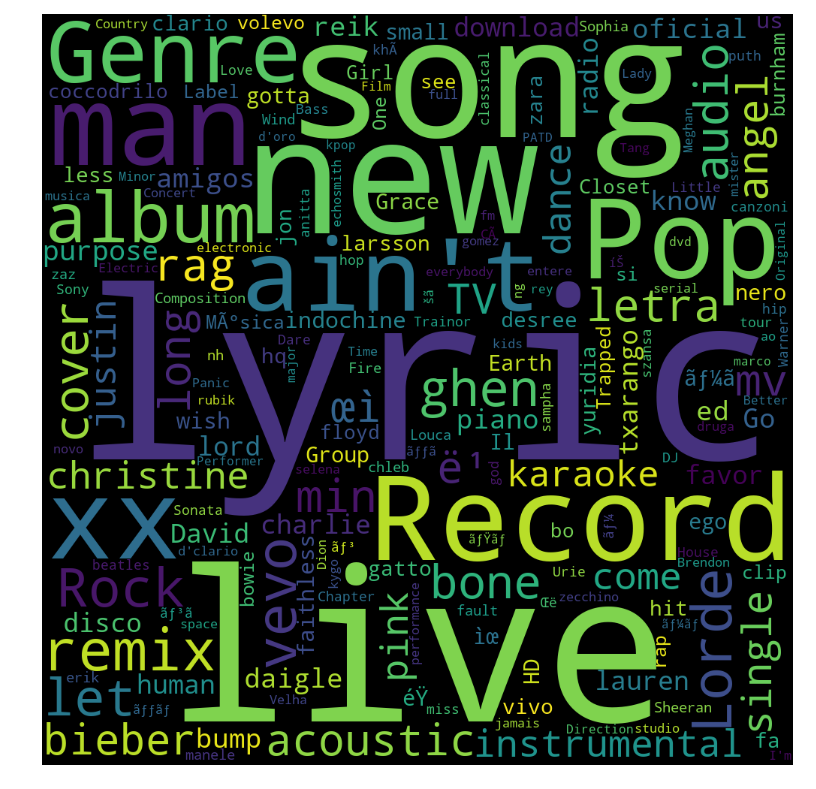

In [9]:
print_k_word_cloud(1,'tags', max_words=200)

'The Featuring Artists - hit songs and covers'

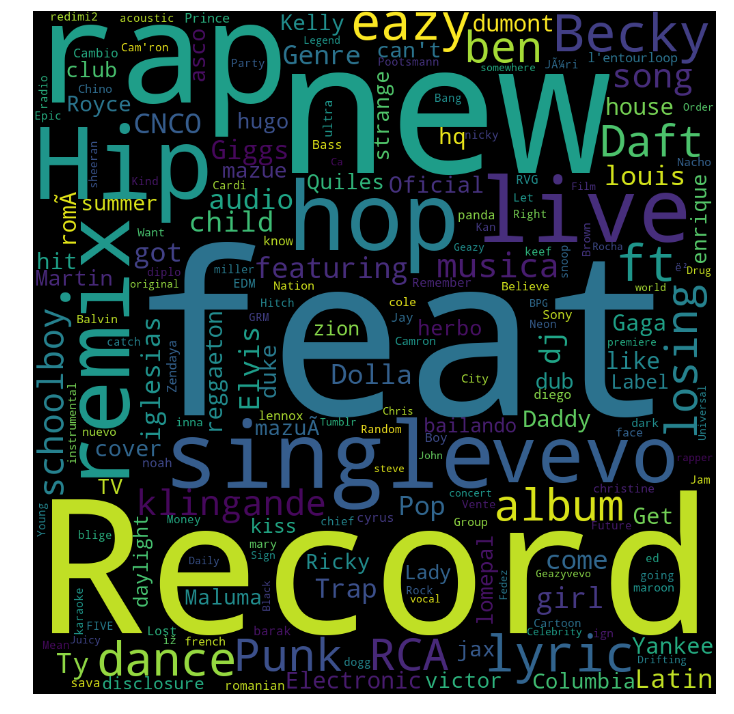

In [8]:
print_k_word_cloud(2,'tags', max_words=200)
"The Featuring Artists - hit songs and covers"

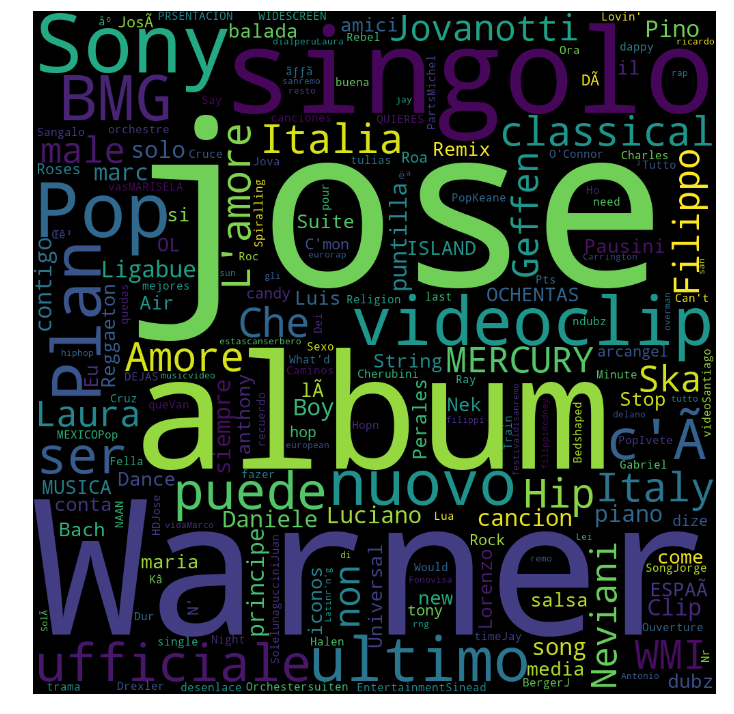

In [81]:
print_k_word_cloud(3,'tags', max_words=100)
"Early youtubers were italian"

'love songs, even german ones - Kontra K - Atme tief ein (Official Video)'

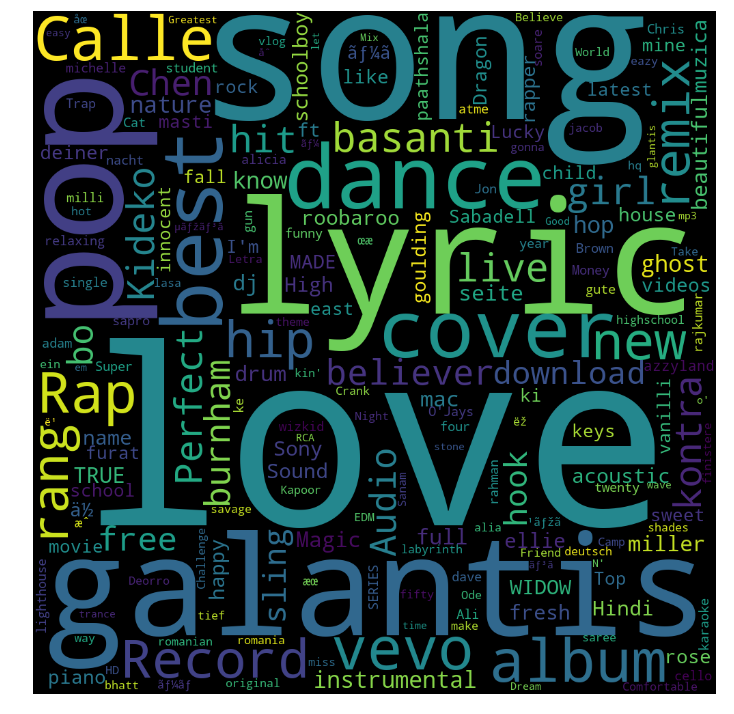

In [82]:
print_k_word_cloud(4,'tags', max_words=100)
"""love songs, even german ones - Kontra K - Atme tief ein (Official Video)"""

'singalong dance grooves and Lead Me Lord - Gary Valenciano (w/ lyrics)'

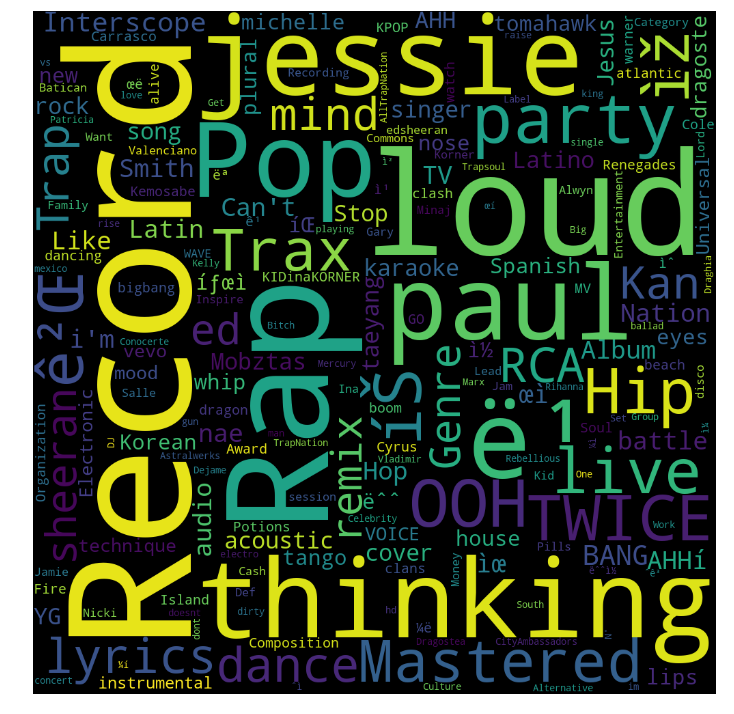

In [83]:
print_k_word_cloud(5,'tags', max_words=100)
"singalong dance grooves and Lead Me Lord - Gary Valenciano (w/ lyrics)"

'latin hip hop'

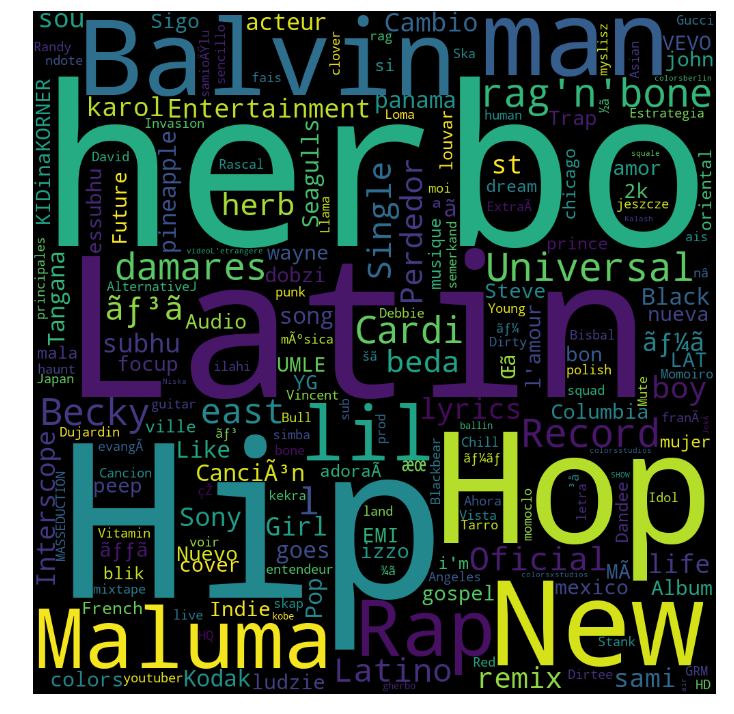

In [84]:
print_k_word_cloud(6,'tags', max_words=100)
"latin hip hop"

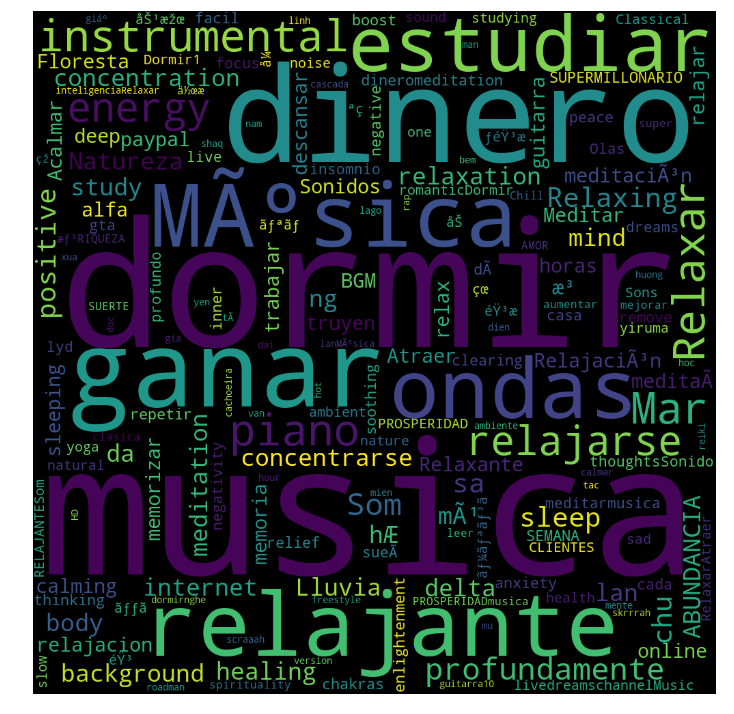

In [85]:
print_k_word_cloud(7,'tags', max_words=100)

'hip hop and halloween'

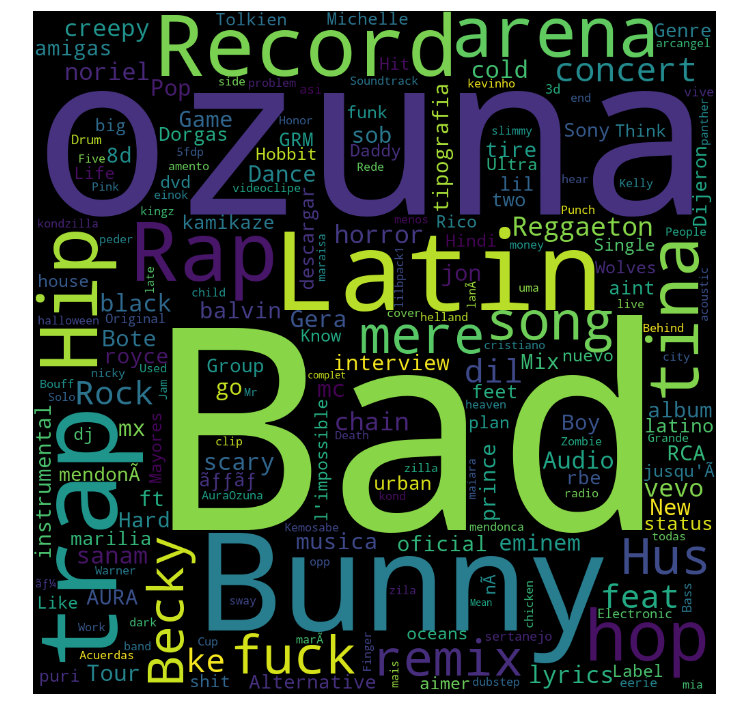

In [86]:
print_k_word_cloud(8,'tags', max_words=100)
"hip hop and halloween"

'instrumental music to work with'

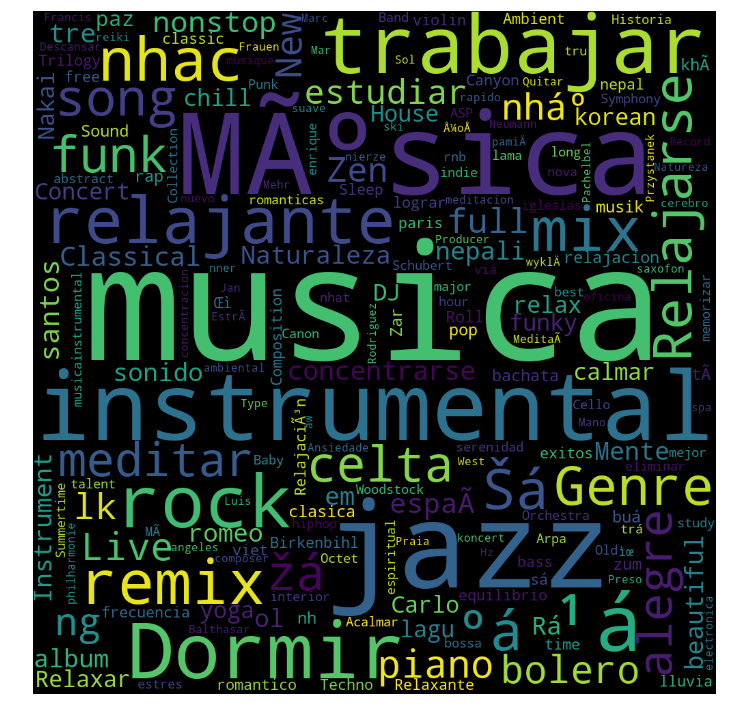

In [87]:
print_k_word_cloud(9,'tags', max_words=100)
"instrumental music to work with"

'Christmas classical, concertoss, movie soundtracks and bollywood'

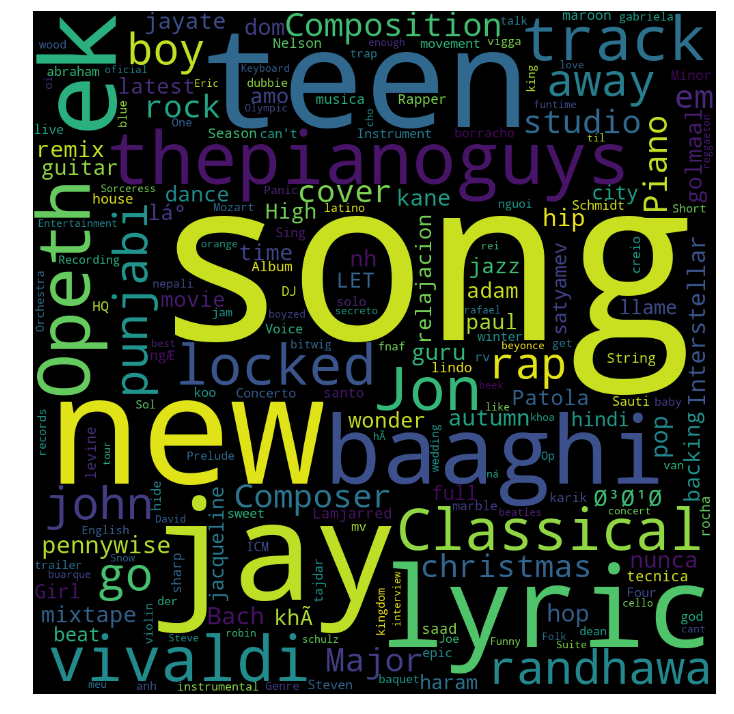

In [88]:
print_k_word_cloud(10,'tags', max_words=100)
"Christmas classical, concertoss, movie soundtracks and bollywood"

'Chinese, festivals'

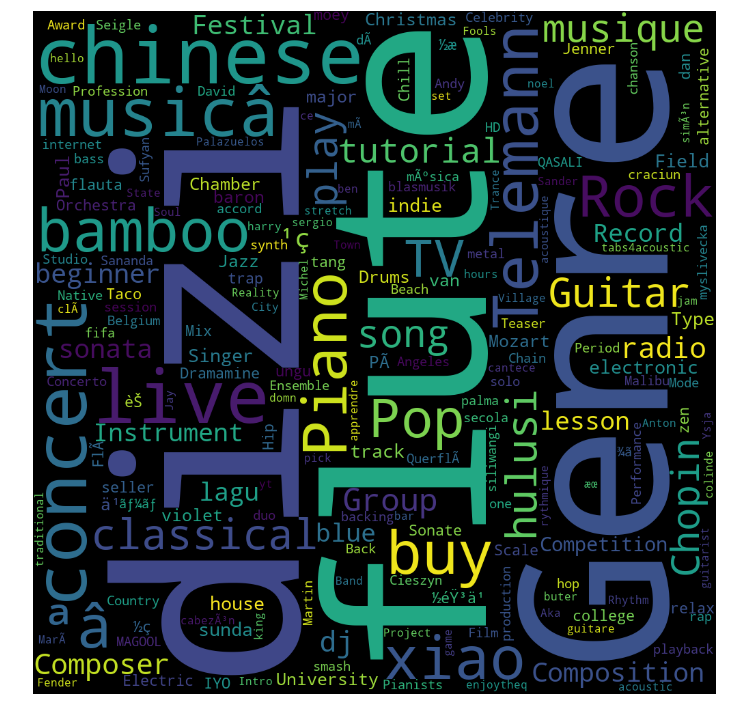

In [90]:
print_k_word_cloud(11,'tags', max_words=200)
"Chinese (dizi music), festivals"

'Chinese (dizi music), festivals'

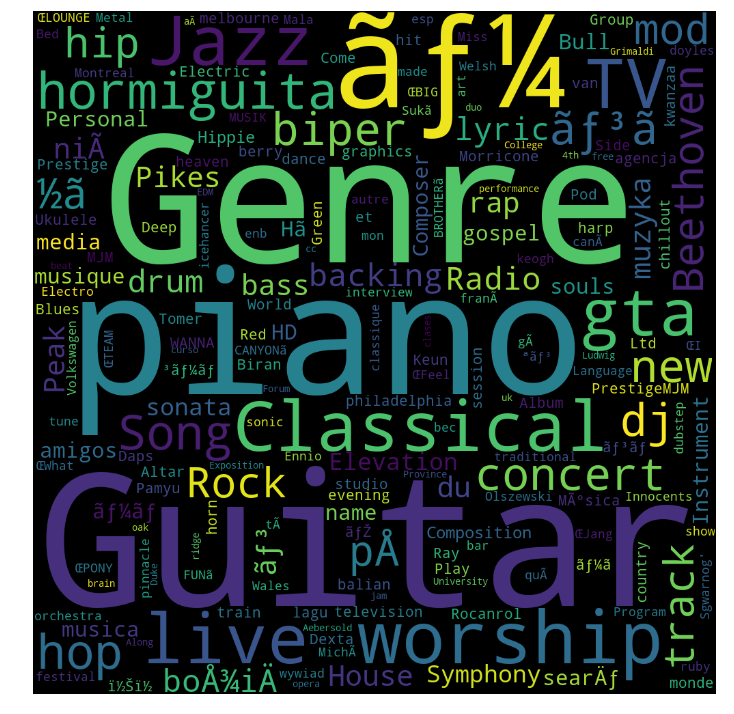

In [91]:
print_k_word_cloud(12,'tags', max_words=200)
"nobody likes dubstep or christian rock, lounge"

# Analysis

In [16]:
rap_words = ['rap', 'hip', 'hop']
pop_words = ['pop', 'hit']
country_words = ['country', 'western']
rock_words = ['rock']
jazz_words = ['jazz']
blues_words = ['blues', 'rthym']
edm_words = ['edm', 'house', 'dance', 'electr', 'dubstep']
relax_words = ['relax', 'dormir', 'relaja', 'sleep', 'study', 'medit', 'zen', 'trabaja', 'estud', 'ambient']
latin_words = ['latin', 'musica,']
other_rock_words = ['metal', 'heavy', 'punk']
classical_words = ['classical', 'composer', 'symphony', 'sonata', 'concerto', 'beethoven', 'bach']
folk_words = ['folk', 'banjo', 'indie']
reggae_words = ['reggae,']
halloween_words = ['creepy', 'halloween', 'eerie', 'horror', 'wolves']

In [20]:
genre_list = [rap_words,pop_words, country_words, rock_words, jazz_words, blues_words, edm_words, 
              relax_words, latin_words, other_rock_words, classical_words,
              folk_words,reggae_words, halloween_words]
genre_list_str = ['rap_words','pop_words', 'country_words', 'rock_words', 'jazz_words', 'blues_words', 'edm_words', 
              'relax_words', 'latin_words', 'other_rock_words', 'classical_words',
              'folk_words','reggae_words', 'halloween_words']

In [12]:
df_classified.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent', 'likeCount', 'publishedAt',
       'regionRestriction', 'tags', 'title', 'vidId', 'viewCount',
       'request_token', 'letter_search', 'contentRating', 'year', 'month',
       'month_day', 'year_day', 'week_day', 'view_log', 'comment_log',
       'like_log', 'dislike_log', 'view_class', 'week',
       'description_sentiment', 'description_wordcount', 'tags_sentiment',
       'tags_wordcount', 'title_sentiment', 'title_wordcount',
       'title_featuring', 'intitle_a', 'intitle_b', 'intitle_c', 'intitle_d',
       'intitle_e', 'intitle_f', 'intitle_g', 'intitle_h', 'intitle_i',
       'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n',
       'intitle_o', 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s',
       'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w', 'intitle_x',
       'intitle_y', 'in

In [49]:
df_tagged = df_classified

In [50]:
df_tagged = df_classified.loc[:, ['tags', 'publishedAt', 'description_sentiment', 'duration','tags_sentiment','title_length', 'lv_ratio',
       'comment_view_ratio', 'like_dislike_ratio',  'kclass',
                                 'title', 'view_log', 'vidId']].reindex()

In [51]:
for i in range(len(genre_list)):
    df_tagged[genre_list_str[i]] = df_tagged.tags.map(lambda x: 1*(len([element for element in genre_list[i] if element in str(x)])>0))

In [52]:
df_tagged['vidId'] = df_tagged.vidId.map(lambda x: 'https://www.youtube.com/watch?v='+str(x))

In [53]:
df_tagged.vidId

0       https://www.youtube.com/watch?v=xTIP_FOdq24
1       https://www.youtube.com/watch?v=CkLPal4qt50
2       https://www.youtube.com/watch?v=Wx1jNRHoKyo
3       https://www.youtube.com/watch?v=Q-0mLKNhFX0
4       https://www.youtube.com/watch?v=thQWqRDZj7E
5            https://www.youtube.com/watch?v=#NAME?
6       https://www.youtube.com/watch?v=zTG3BrJqXrs
7       https://www.youtube.com/watch?v=8uRXw8pYCbM
8       https://www.youtube.com/watch?v=SCnsEy0tpbw
9       https://www.youtube.com/watch?v=Q0q9a5QS6WQ
10      https://www.youtube.com/watch?v=m3We7p78XTo
11      https://www.youtube.com/watch?v=D3HwnYbU_1A
12      https://www.youtube.com/watch?v=zXwZrlGxaXc
13      https://www.youtube.com/watch?v=KjGI3FyG3FY
14      https://www.youtube.com/watch?v=TPRXDLfzkeg
15      https://www.youtube.com/watch?v=Goys33LLBUk
16      https://www.youtube.com/watch?v=idk9tZcwACQ
17      https://www.youtube.com/watch?v=nsm4ReJaED0
18      https://www.youtube.com/watch?v=lWh1TKGmGJk
19      http

In [41]:
df_tagged['tot_words'] =df_tagged.loc[:, genre_list_str].sum(axis=1)

In [43]:
#df_tagged.to_csv('./data/classifieds/classified_genres3.csv', index=False)